## Comparative run
Sample THEx data so that it is consistent with the filtered PLASTICCS data. THEN run the model on this data and see if there is a difference between this and the original model with the original data.

## 1. Pull down THEx filtered data

In [1]:
from evaluation.sampling_test import *

In [ ]:
Ia_sampled, Ia_rand_sample = get_THEx_sampled_data(class_name = "Ia", max_rmag = 23, 
                                        num_samples = 500)
II_sampled, II_rand_sample = get_THEx_sampled_data(class_name = "II", max_rmag = 23,
                                        num_samples = 500)


Class count : 129


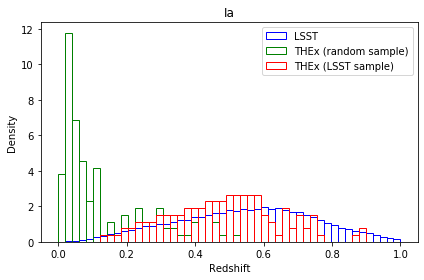

In [2]:
Ia_sampled, Ia_rand_sample = get_THEx_sampled_data(class_name = "Ia", 
                                        max_rmag = None, 
                                        num_samples = 200)


Class count : 151


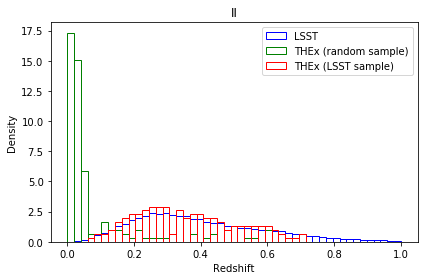

In [3]:
II_sampled, II_rand_sample = get_THEx_sampled_data(class_name = "II", 
                                        max_rmag = None, 
                                        num_samples = 200)

In [ ]:

def plot_compare_feature_dists(feature_name, class_name, rand_sample, sampled):

    fig, ax = plt.subplots(tight_layout=True, sharex=True,  sharey=True)

    
    if feature_name == 'redshift':
        bins = np.linspace(0,1,20)
        plt.xlim((0,1))
    else:
        # mag
        bins = np.linspace(9,23,50)
        plt.xlim((9,23))
        
    b = ax.hist(rand_sample[feature_name].values, bins=bins, density=True, 
                label="THEx (random sample)", fill=False, edgecolor='green')
    a = ax.hist(sampled[feature_name].values, bins=bins, density=True,  
                label="THEx (LSST sample)", fill=False, edgecolor='red')
    
    plt.legend()
    plt.title(class_name)
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.savefig("../figures/evaluation/feature_dist_" + feature_name + "_" + class_name)


In [ ]:
f='r_mag'

plot_compare_feature_dists(feature_name=f, 
                           class_name="Ia", 
                           rand_sample=Ia_rand_sample, 
                           sampled=Ia_sampled)
plot_compare_feature_dists(feature_name=f, 
                           class_name="II", 
                           rand_sample=II_rand_sample, 
                           sampled=II_sampled)

Save sampled THEx data 

In [ ]:
import pandas as pd

# THEx data, sampled like LSST 
sampled_data = pd.concat([Ia_sampled, II_sampled])
#Shuffle
sampled_data = sampled_data.sample(frac=1).reset_index(drop=True)
# Split
y_sampled = sampled_data[['transient_type']] 
X_sampled = sampled_data.drop(labels=['transient_type'], axis =1 )


# THEx data, randomly sampled
combined_df = pd.concat([Ia_rand_sample, II_rand_sample])
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
y_rand_sample = combined_df[['transient_type']]
X_rand_sample = combined_df.drop(labels=['transient_type'], axis=1)


## 2. Run Evaluation
Run model on THEx data as-is - be sure to use the same NUMBER of class samples as above.

### A: Evaluate LSST-range-matched sampled data

In [ ]:
from models.multi_model.multi_model import MultiModel
%matplotlib inline


ordered_mags = ["g_mag", "r_mag", "i_mag", "z_mag", "y_mag",
        "W1_mag", "W2_mag", "H_mag", "K_mag", 'J_mag']
#        "redshift"]
model = MultiModel(cols = ordered_mags, 
           class_labels = ['Ia', 'II'],
           transform_features = False,
           min_class_size = 40,
           folds=20
          )

valid_X, valid_y = remove_testing_data(model.X, model.y, X_sampled[list(model.X)]) 

model.X = valid_X
model.y = valid_y

get_test_results(model, X_sampled[list(model.X)], 
                 y_sampled)



### B: Evaluate on original sampled data

In [ ]:
model = MultiModel(cols = ordered_mags, 
           class_labels = ['Ia', 'II'],
           transform_features = False,
           min_class_size = 40,
           folds=20
          )

valid_X, valid_y = remove_testing_data(model.X, model.y, X_rand_sample[list(model.X)]) 

model.X = valid_X
model.y = valid_y

get_test_results(model, 
                 X_rand_sample[list(model.X)], 
                 y_rand_sample)

